In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from datetime import datetime


In [3]:
df= pd.read_csv('cabride.csv')

In [100]:
pd.set_option=('display.max_rows',None)

In [4]:
df.head(10)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit
5,01-06-2016 17:15,01-06-2016 17:19,Business,West Palm Beach,West Palm Beach,4.3,Meal/Entertain
6,01-06-2016 17:30,01-06-2016 17:35,Business,West Palm Beach,Palm Beach,7.1,Meeting
7,01-07-2016 13:27,01-07-2016 13:33,Business,Cary,Cary,0.8,Meeting
8,01-10-2016 08:05,01-10-2016 08:25,Business,Cary,Morrisville,8.3,Meeting
9,01-10-2016 12:17,01-10-2016 12:44,Business,Jamaica,New York,16.5,Customer Visit


In [28]:
df.tail(15)

,START_DATE*,END_DATE*,CATEGORY*,START*,STOP*,MILES*,PURPOSE*
1140,12/29/2016 18:59,12/29/2016 19:14,Business,Kar?chi,Unknown Location,3.0,Meal/Entertain
1141,12/29/2016 19:50,12/29/2016 20:10,Business,Unknown Location,Kar?chi,4.1,Customer Visit
1142,12/29/2016 20:15,12/29/2016 20:45,Business,Kar?chi,Kar?chi,7.2,Meeting
1143,12/29/2016 20:53,12/29/2016 21:42,Business,Kar?chi,Unknown Location,6.4,NaN
1144,12/29/2016 23:14,12/29/2016 23:47,Business,Unknown Location,Kar?chi,12.9,Meeting
1145,12/30/2016 10:15,12/30/2016 10:33,Business,Kar?chi,Kar?chi,2.8,Errand/Supplies
1146,12/30/2016 11:31,12/30/2016 11:56,Business,Kar?chi,Kar?chi,2.9,Errand/Supplies
1147,12/30/2016 15:41,12/30/2016 16:03,Business,Kar?chi,Kar?chi,4.6,Errand/Supplies
1148,12/30/2016 16:45,12/30/2016 17:08,Business,Kar?chi,Kar?chi,4.6,Meeting
1149,12/30/2016 23:06,12/30/2016 23:10,Business,Kar?chi,Kar?chi,0.8,Customer Visit


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   START_DATE*  1155 non-null   object 
 1   END_DATE*    1155 non-null   object 
 2   CATEGORY*    1155 non-null   object 
 3   START*       1155 non-null   object 
 4   STOP*        1155 non-null   object 
 5   MILES*       1155 non-null   float64
 6   PURPOSE*     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [6]:
# changing column names
df.rename(columns={'START_DATE*': 'START_DATE',
                   'END_DATE*' :'END_DATE',
                  'CATEGORY*' :'CATEGORY',
                  'START*' :'START',
                  'STOP*' : 'STOP',
                  'MILES*' : 'MILES',
                  'PURPOSE*' : 'PURPOSE'}, inplace = True)

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
 7   Stdate_dow  1155 non-null   int64         
 8   Endate_dow  1155 non-null   int64         
dtypes: datetime64[ns](2), float64(1), int64(2), object(4)
memory usage: 81.3+ KB


AttributeError: 'function' object has no attribute 'sum'

In [23]:
# converting all object datatypes to string so that value_count() can be applied - input for encoding strategy
df.convert_dtypes().dtypes
#alternate way to do the same thing
#df[['CATEGORY*','START*','STOP*','PURPOSE*']] = df[['CATEGORY*','START*','STOP*','PURPOSE*']].astype(str)


START_DATE     string
END_DATE       string
CATEGORY       string
START          string
STOP           string
MILES         float64
PURPOSE        string
dtype: object

In [24]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [25]:
df['PURPOSE'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [26]:
df['START'].value_counts()

Cary                   201
Unknown Location       148
Morrisville             85
Whitebridge             68
Islamabad               57
                      ... 
Parkwood                 1
Katy                     1
Marigny                  1
Winston Salem            1
Pontchartrain Beach      1
Name: START, Length: 177, dtype: int64

In [27]:
df['STOP'].value_counts()

Cary                  203
Unknown Location      149
Morrisville            84
Whitebridge            65
Islamabad              58
                     ... 
Stonewater              1
Tenderloin              1
Daytona Beach           1
Financial District      1
East Elmhurst           1
Name: STOP, Length: 188, dtype: int64

# one hot encoding with multiple categories can be applied to start and stop and purpose( after replacing nan) column

In [28]:
df.isnull().sum()

START_DATE      0
END_DATE        0
CATEGORY        0
START           0
STOP            0
MILES           0
PURPOSE       502
dtype: int64

In [29]:
df.nunique()

START_DATE    1154
END_DATE      1154
CATEGORY         2
START          177
STOP           188
MILES          256
PURPOSE         10
dtype: int64

## Investigation on Startdate and Enddate column 

In [30]:
#converting object to datetime
#df['DataFrame Column'] = pd.to_datetime(df['DataFrame Column'], format=specify your format)
df['START_DATE'] = pd.to_datetime(df['START_DATE'])
df['END_DATE'] = pd.to_datetime(df['END_DATE'])

In [31]:
# validating the change
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1155 entries, 0 to 1154
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   START_DATE  1155 non-null   datetime64[ns]
 1   END_DATE    1155 non-null   datetime64[ns]
 2   CATEGORY    1155 non-null   object        
 3   START       1155 non-null   object        
 4   STOP        1155 non-null   object        
 5   MILES       1155 non-null   float64       
 6   PURPOSE     653 non-null    object        
dtypes: datetime64[ns](2), float64(1), object(4)
memory usage: 63.3+ KB


In [32]:
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

In [33]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [34]:
df['START_DATE'].dt.hour.head()


0    21
1     1
2    20
3    17
4    14
Name: START_DATE, dtype: int64

In [35]:
df['START_DATE'].dt.dayofweek.head()

0    4
1    5
2    5
3    1
4    2
Name: START_DATE, dtype: int64

In [36]:
df['Stdate_dow'] = df['START_DATE'].dt.dayofweek

In [37]:
df['Endate_dow'] = df['END_DATE'].dt.dayofweek

In [38]:
df


,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Stdate_dow,Endate_dow
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,4,4
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,5,5
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,5,5
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,1,1
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,2,2
...,...,...,...,...,...,...,...,...,...
1150,2016-12-31 01:07:00,2016-12-31 01:14:00,Business,Kar?chi,Kar?chi,0.7,Meeting,5,5
1151,2016-12-31 13:24:00,2016-12-31 13:42:00,Business,Kar?chi,Unknown Location,3.9,Temporary Site,5,5
1152,2016-12-31 15:03:00,2016-12-31 15:38:00,Business,Unknown Location,Unknown Location,16.2,Meeting,5,5
1153,2016-12-31 21:32:00,2016-12-31 21:50:00,Business,Katunayake,Gampaha,6.4,Temporary Site,5,5


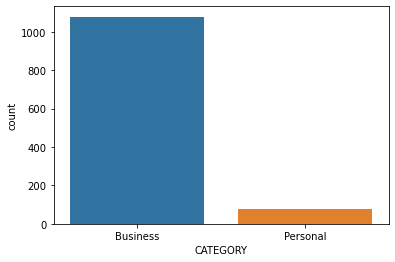

In [53]:
# investigating on category of journey
sns.countplot(x='CATEGORY',data = df)
# Buisness rides are much more than personal rides.

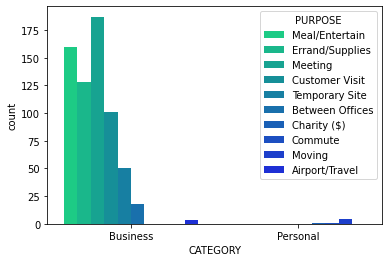

In [55]:
sns.countplot(x='CATEGORY', hue='PURPOSE', data = df, palette='winter_r')

In [40]:
df['PURPOSE'].unique()

array(['Meal/Entertain', nan, 'Errand/Supplies', 'Meeting',
       'Customer Visit', 'Temporary Site', 'Between Offices',
       'Charity ($)', 'Commute', 'Moving', 'Airport/Travel'], dtype=object)

In [41]:

df['PURPOSE'].value_counts()

Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [42]:
df['START'].value_counts()

Cary                   201
Unknown Location       148
Morrisville             85
Whitebridge             68
Islamabad               57
                      ... 
Parkwood                 1
Katy                     1
Marigny                  1
Winston Salem            1
Pontchartrain Beach      1
Name: START, Length: 177, dtype: int64

In [43]:
df['STOP'].value_counts()

Cary                  203
Unknown Location      149
Morrisville            84
Whitebridge            65
Islamabad              58
                     ... 
Stonewater              1
Tenderloin              1
Daytona Beach           1
Financial District      1
East Elmhurst           1
Name: STOP, Length: 188, dtype: int64

### INVESTIGATION ON PURPOSE COLUMN HAVING NULL VALUE

In [60]:
# create df1 = all null purpose data
# to see all rows that has null value in PURPOSE COLUMN
df1 = df[df.filter(like='PURPOSE').isnull().any(1)]


In [63]:
df1

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE,Stdate_dow,Endate_dow
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN,5,5
32,2016-01-19 09:09:00,2016-01-19 09:23:00,Business,Whitebridge,Lake Wellingborough,7.2,NaN,1,1
85,2016-02-09 10:54:00,2016-02-09 11:07:00,Personal,Whitebridge,Northwoods,5.3,NaN,1,1
86,2016-02-09 11:43:00,2016-02-09 11:50:00,Personal,Northwoods,Tanglewood,3.0,NaN,1,1
87,2016-02-09 13:36:00,2016-02-09 13:52:00,Personal,Tanglewood,Preston,5.1,NaN,1,1
...,...,...,...,...,...,...,...,...,...
1065,2016-12-19 14:18:00,2016-12-19 14:32:00,Business,Unknown Location,Unknown Location,5.3,NaN,0,0
1066,2016-12-19 14:37:00,2016-12-19 14:50:00,Business,Unknown Location,Unknown Location,5.4,NaN,0,0
1069,2016-12-19 19:05:00,2016-12-19 19:17:00,Business,Islamabad,Unknown Location,2.2,NaN,0,0
1071,2016-12-20 08:49:00,2016-12-20 09:24:00,Business,Unknown Location,Rawalpindi,12.0,NaN,1,1


In [68]:
df1['CATEGORY'].value_counts()

Business    431
Personal     71
Name: CATEGORY, dtype: int64

In [69]:
df1['START'].value_counts()

Unknown Location    93
Islamabad           42
Cary                40
Whitebridge         32
Morrisville         31
                    ..
Chessington          1
Fort Pierce          1
South Berkeley       1
NOMA                 1
Tanglewood           1
Name: START, Length: 106, dtype: int64

In [70]:
df1['STOP'].value_counts()

Unknown Location        93
Cary                    48
Islamabad               44
Whitebridge             28
Morrisville             24
                        ..
Isles of Buena Vista     1
Kilarney Woods           1
Tenderloin               1
Columbia Heights         1
South Berkeley           1
Name: STOP, Length: 106, dtype: int64

In [72]:
## Purpose null has no link with end day of the journey
df1['Endate_dow'].value_counts()

0    87
4    81
1    80
5    66
2    64
6    62
3    62
Name: Endate_dow, dtype: int64

In [ ]:
## Purpose null has no link with start day of the journey
df1['Stdate_dow'].value_counts()

In [46]:
# seeing whether null Purpose has any relation with start ya stop point
#seeing whether null Purpose has any relation with miles ya time of start/stop/ category point
df['PURPOSE'].value_counts()


Meeting            187
Meal/Entertain     160
Errand/Supplies    128
Customer Visit     101
Temporary Site      50
Between Offices     18
Moving               4
Airport/Travel       3
Charity ($)          1
Commute              1
Name: PURPOSE, dtype: int64

In [47]:
df.nunique()

START_DATE    1154
END_DATE      1154
CATEGORY         2
START          177
STOP           188
MILES          256
PURPOSE         10
Stdate_dow       7
Endate_dow       7
dtype: int64

In [48]:
df['START'].value_counts()

Cary                   201
Unknown Location       148
Morrisville             85
Whitebridge             68
Islamabad               57
                      ... 
Parkwood                 1
Katy                     1
Marigny                  1
Winston Salem            1
Pontchartrain Beach      1
Name: START, Length: 177, dtype: int64

In [49]:
df['MILES'].sum()

12204.7

In [50]:

df['MILES'].isnull().sum()

0

In [51]:
# to see whether there is any corelation between day of journey and journey distance 
df.corr()
## allmost all journeys have same start date and end date 

,MILES,Stdate_dow,Endate_dow
MILES,1.000000,0.081122,0.091155
Stdate_dow,0.081122,1.000000,0.994638
Endate_dow,0.091155,0.994638,1.000000


In [56]:
#df[df[df.filter(like='PURPOSE').isnull().any(1)].['START']].value_counts()

In [57]:
df['MILES'].describe()

count    1155.000000
mean       10.566840
std        21.579106
min         0.500000
25%         2.900000
50%         6.000000
75%        10.400000
max       310.300000
Name: MILES, dtype: float64

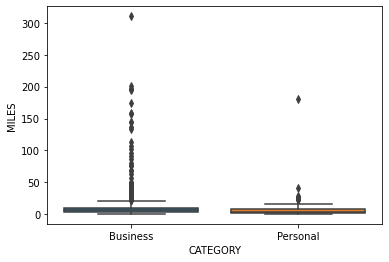

In [58]:
sns.boxplot(x='CATEGORY',y='MILES',data=df)

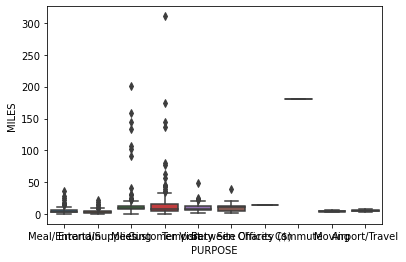

In [59]:
sns.boxplot(x='PURPOSE',y='MILES',data=df)